# Load data from SD card

Here we load data from a .dat file saved with the SpikeGadgets 128-channel datalogger (http://www.spikegadgets.com/hardware/hh128.html).

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

import nelpy as nel
import nelpy.io
import nelpy.plotting as npl

# assume default aesthetics
npl.setup()

%matplotlib inline

### First, we need to specify where the .dat file is located

In [2]:
datadirs = ['/home/etienne/Data/temp/',
            '/home/etienne/Data/BradPfeiffer/',
            'D:/Dropbox/neoReader/BradPfeiffer/',
            'C:/Etienne/Dropbox/neoReader/BradPfeiffer/']

fileroot = next( (dir for dir in datadirs if os.path.isdir(dir)), None)

if fileroot is None:
    raise FileNotFoundError('datadir not found')
    
filename = fileroot + 'install_05-31-2017_sd02.dat'

### Next, we create an sd_reader object, and read the desired channels

In [4]:
sd_reader = nel.io.SDReader()

channels = [56, 57, 58, 59] # presumably tetrode 15?
lfp = sd_reader.read_eeg(filename, channels=channels, duration=180, fs_out=1000)

/home/etienne/Dropbox/code/nelpy/nelpy/core/_analogsignalarray.py:266: UserWarning: creating support from time and sampling rate, fs!


### That's all there is to it! Now we can interact with the `lfp` AnalogSignalArray as we wish

<AnalogSignalArray at 0x7f9853a8aa58: 4 signals (14 segments)> for a total of 30:37:961 minutes
memory usage: 70.113 megabytes


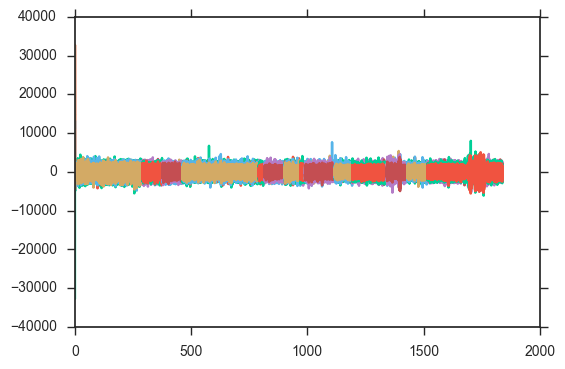

In [5]:
# inspect lfp object
print(lfp)

# check how much memory we are using
print("memory usage:", lfp.n_bytes)

# plot data in lfp
ax = npl.plot(lfp)

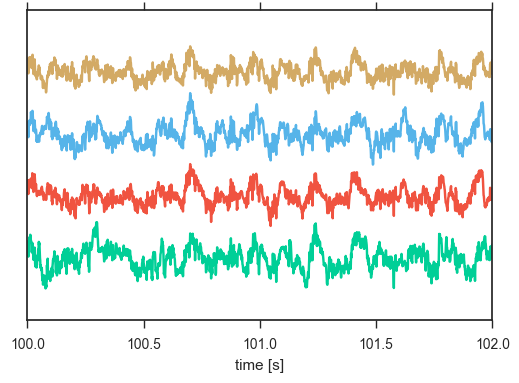

In [15]:
lfp._support = lfp.support.merge(gap=0.005)
ep = nel.EpochArray([100,102])

for cc, channel in enumerate(lfp.signals):
    npl.plot(channel[ep] + cc*5000)
    
ax = plt.gca()
ax.set_ylim(-5000, 20000);
npl.utils.no_yticklabels(ax)
npl.utils.no_yticks(ax)
ax.set_xlabel('time [s]')
# ax.set_xlim(lfp.support.start, lfp.support.stop);
ax.set_xlim(*ep.time);

In [19]:
# create a jar to put pickled items in
jar = nel.ResultsContainer(lfp=lfp, description="example lfp data from SD card")
jar.save_pkl('jar.nel')

In [22]:
# load pickled items from jar
jar = nel.load_pkl('data/jar.nel')
lfp = jar.lfp